In [ ]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

x1 = 50
x2 = 50

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('volume') - pl.col('volume').shift(x1)).alias('volume_change'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

df = df.with_columns([
    (pl.col('vwap') - pl.col('close')).rolling_max(x2).alias('vwap_close_max'),
    (pl.col('vwap') - pl.col('close')).rolling_min(x2).alias('vwap_close_min')
])

df = df.with_columns([
    pl.col('vwap_close_max').rank('dense').over('open_time').alias('vwap_close_max_rank'),
    pl.col('vwap_close_min').rank('dense').over('open_time').alias('vwap_close_min_rank'),
    pl.col('volume_change').rank('dense').over('open_time').alias('volume_change_rank')
])

df = df.with_columns([
    (pl.col('vwap_close_max_rank') + pl.col('vwap_close_min_rank') * pl.col('volume_change_rank')).alias('alpha011_rank')
])

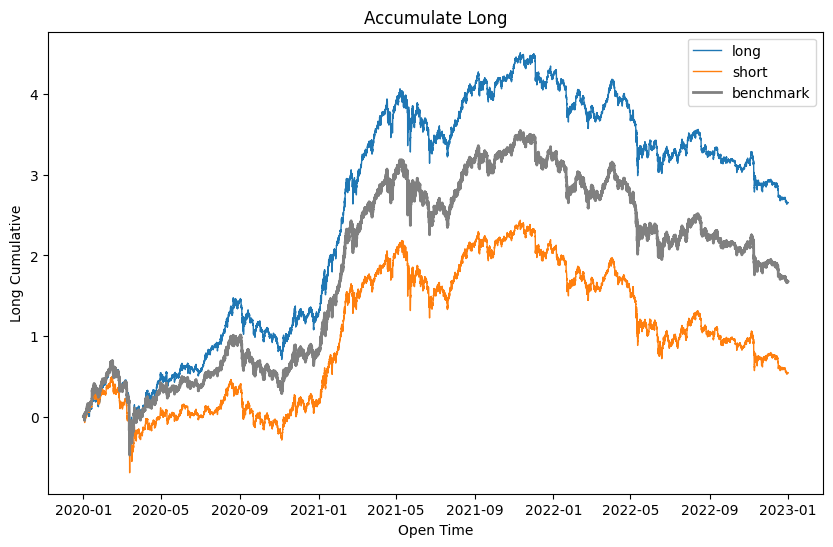

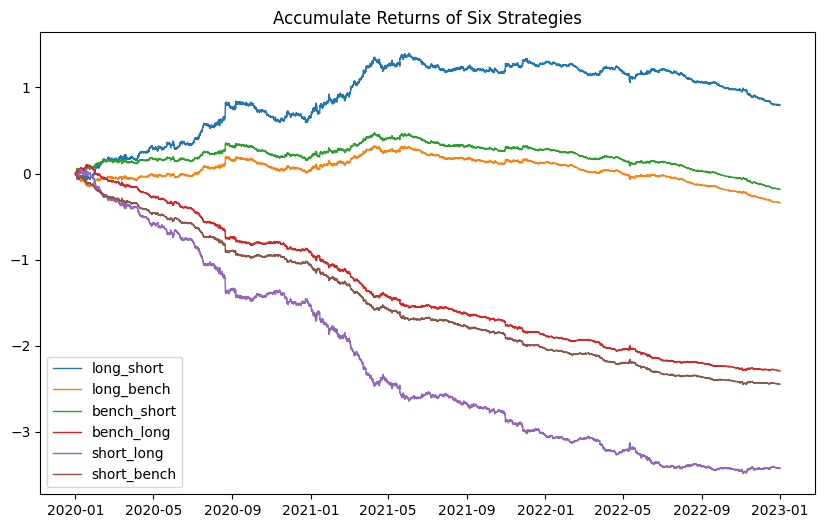

long: 
ann_return = 0.8828  sharpe = 0.7806  maxdd = 0.6728  calmar_ratio = 1.3122  

short: 
ann_return = 0.1806  sharpe = 0.1705  maxdd = 0.794  calmar_ratio = 0.2274  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 0.2643  sharpe = 0.9273  maxdd = 0.2528  calmar_ratio = 1.0454  

long_bench: 
ann_return = -0.1127  sharpe = -0.7714  maxdd = 0.5005  calmar_ratio = -0.2252  

bench_long: 
ann_return = -0.7633  sharpe = -5.2242  maxdd = 2.1719  calmar_ratio = -0.3514  

short_long: 
ann_return = -1.1403  sharpe = -4.0011  maxdd = 3.3471  calmar_ratio = -0.3407  

short_bench: 
ann_return = -0.815  sharpe = -5.7001  maxdd = 2.4479  calmar_ratio = -0.3329  

bench_short: 
ann_return = -0.061  sharpe = -0.427  maxdd = 0.445  calmar_ratio = -0.1372  



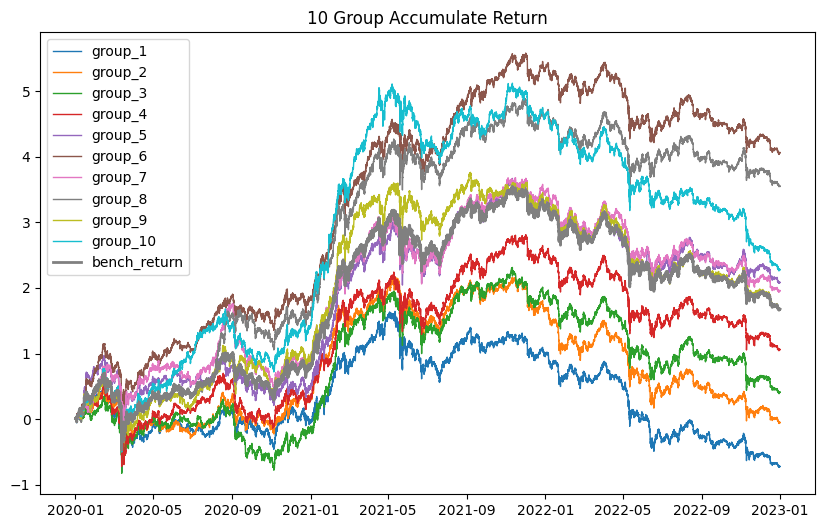

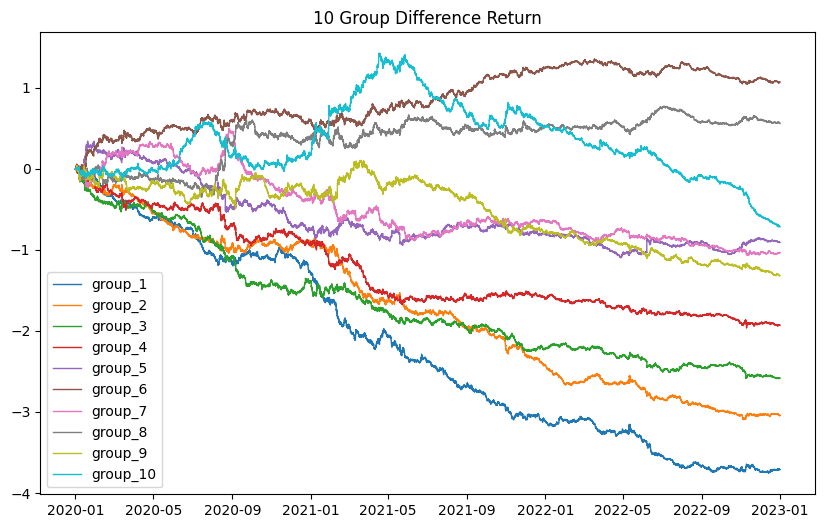

group_1: 
ann_return = -0.2407  sharpe = -0.2347  maxdd = 0.9  calmar_ratio = -0.2674  

group_2: 
ann_return = -0.0174  sharpe = -0.0162  maxdd = 0.7294  calmar_ratio = -0.0239  

group_3: 
ann_return = 0.1356  sharpe = 0.1229  maxdd = 0.8709  calmar_ratio = 0.1556  

group_4: 
ann_return = 0.3524  sharpe = 0.3087  maxdd = 0.8169  calmar_ratio = 0.4314  

group_5: 
ann_return = 0.6929  sharpe = 0.5978  maxdd = 0.6079  calmar_ratio = 1.1397  

group_6: 
ann_return = 1.3525  sharpe = 1.1519  maxdd = 0.5565  calmar_ratio = 2.4305  

group_7: 
ann_return = 0.6515  sharpe = 0.5527  maxdd = 0.5718  calmar_ratio = 1.1394  

group_8: 
ann_return = 1.1817  sharpe = 0.9977  maxdd = 0.6635  calmar_ratio = 1.781  

group_9: 
ann_return = 0.5569  sharpe = 0.4696  maxdd = 0.6793  calmar_ratio = 0.8198  

group_10: 
ann_return = 0.7569  sharpe = 0.6371  maxdd = 0.7184  calmar_ratio = 1.0537  

-----------------------------------------
group_difference_1: 
ann_return = -1.2362  sharpe = -3.5424  maxd

In [ ]:
factors = df.select(['open_time', 'symbol', 'alpha011_rank'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()